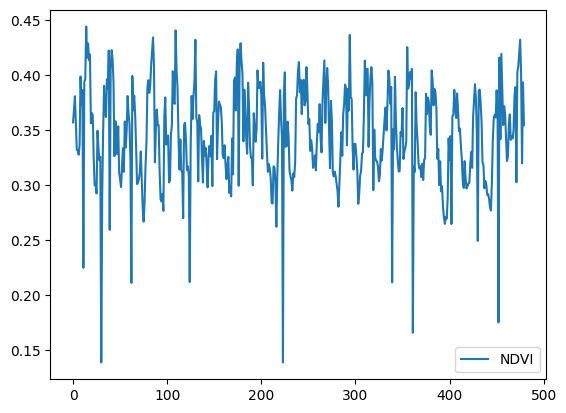

In [3]:
#1a
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"D:/Downloads/NDVI_TimeSeries_MODIS (1).csv")
df.plot()
plt.show()

In [4]:
print(df.head())
df.info()

         date      NDVI
0  18-02-2000  0.357012
1    5/3/2000  0.367913
2  21-03-2000  0.380757
3    6/4/2000  0.355394
4  22-04-2000  0.332275
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    480 non-null    object 
 1   NDVI    480 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [6]:
#1b
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date',inplace=True)
df.head()

,NDVI
date,
2000-02-18,0.357012
2000-03-05,0.367913
2000-03-21,0.380757
2000-04-06,0.355394
2000-04-22,0.332275


In [7]:
#1c
print(df.loc['2000-04-22','NDVI'])


0.332274984


In [8]:
#1d
df_1985=df.loc['2000']
print(df_1985)

                NDVI
date                
2000-02-18  0.357012
2000-03-05  0.367913
2000-03-21  0.380757
2000-04-06  0.355394
2000-04-22  0.332275
2000-05-08  0.331453
2000-05-24  0.327655
2000-06-09  0.336797
2000-06-25  0.398701
2000-07-11  0.372695
2000-07-27  0.386375
2000-08-12  0.224898
2000-08-28  0.394118
2000-09-13  0.396150
2000-09-29  0.444213
2000-10-15  0.415787
2000-10-31  0.428758
2000-11-16  0.413561
2000-12-02  0.418774
2000-12-18  0.356153


In [9]:
#1e
df.describe()

,NDVI
count,480.000000
mean,0.345496
std,0.044240
min,0.138755
25%,0.316745
50%,0.345142
75%,0.378796
max,0.444213


In [10]:
#2a
df['Month']=df.index.month
df['DayOfWeek']=df.index.dayofweek
df.head()

,NDVI,Month,DayOfWeek
date,,,
2000-02-18,0.357012,2,4
2000-03-05,0.367913,3,6
2000-03-21,0.380757,3,1
2000-04-06,0.355394,4,3
2000-04-22,0.332275,4,5


In [11]:
#2b
df['NDVI_lag1']=df['NDVI'].shift(1)
df.head()

,NDVI,Month,DayOfWeek,NDVI_lag1
date,,,,
2000-02-18,0.357012,2,4,NaN
2000-03-05,0.367913,3,6,0.357012
2000-03-21,0.380757,3,1,0.367913
2000-04-06,0.355394,4,3,0.380757
2000-04-22,0.332275,4,5,0.355394


In [12]:
#2c
df['rolling_mean']=df['NDVI'].rolling(window=7).mean()
df.head(10)

,NDVI,Month,DayOfWeek,NDVI_lag1,rolling_mean
date,,,,,
2000-02-18,0.357012,2,4,NaN,NaN
2000-03-05,0.367913,3,6,0.357012,NaN
2000-03-21,0.380757,3,1,0.367913,NaN
2000-04-06,0.355394,4,3,0.380757,NaN
2000-04-22,0.332275,4,5,0.355394,NaN
2000-05-08,0.331453,5,0,0.332275,NaN
2000-05-24,0.327655,5,2,0.331453,0.350351
2000-06-09,0.336797,6,4,0.327655,0.347463
2000-06-25,0.398701,6,6,0.336797,0.351862


In [13]:
#2d
df['NDVI_expanding']=df['NDVI'].expanding().mean()
df.head()

,NDVI,Month,DayOfWeek,NDVI_lag1,rolling_mean,NDVI_expanding
date,,,,,,
2000-02-18,0.357012,2,4,NaN,NaN,0.357012
2000-03-05,0.367913,3,6,0.357012,NaN,0.362462
2000-03-21,0.380757,3,1,0.367913,NaN,0.368561
2000-04-06,0.355394,4,3,0.380757,NaN,0.365269
2000-04-22,0.332275,4,5,0.355394,NaN,0.358670


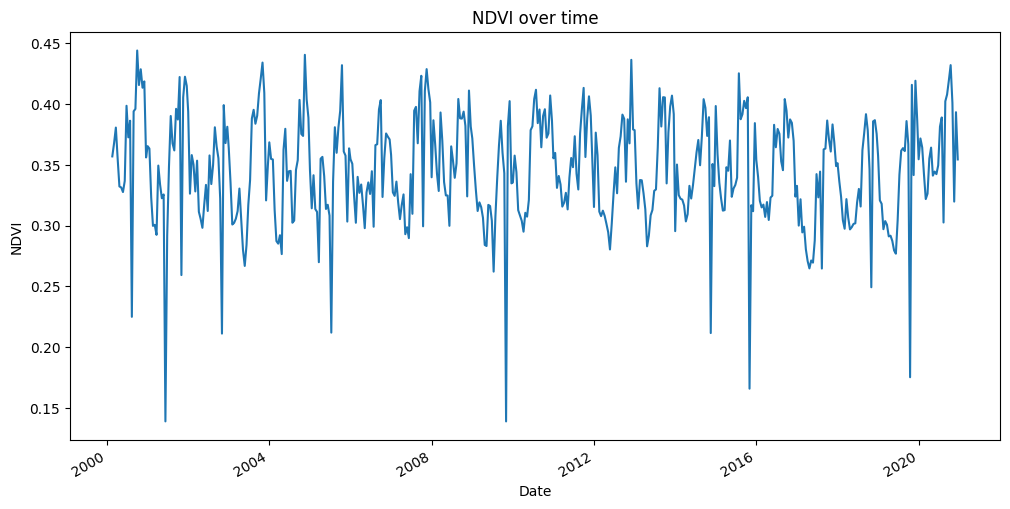

In [14]:
#3a
import matplotlib.pyplot as plt
df['NDVI'].plot(figsize=(12,6))
plt.title('NDVI over time')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.show()

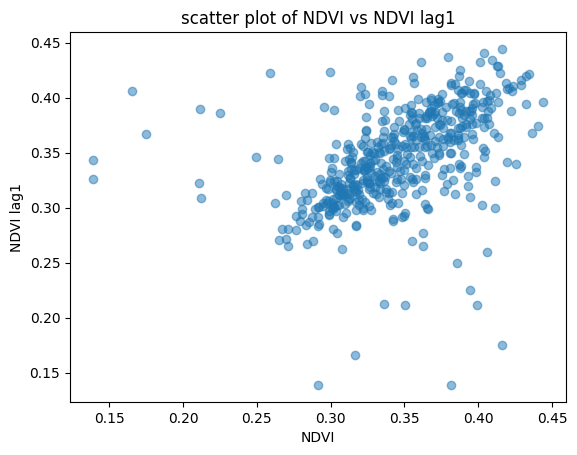

In [15]:
#3b
plt.scatter(df['NDVI'],df['NDVI_lag1'],alpha=0.5)
plt.title('scatter plot of NDVI vs NDVI lag1')
plt.xlabel('NDVI')
plt.ylabel('NDVI lag1')
plt.show()

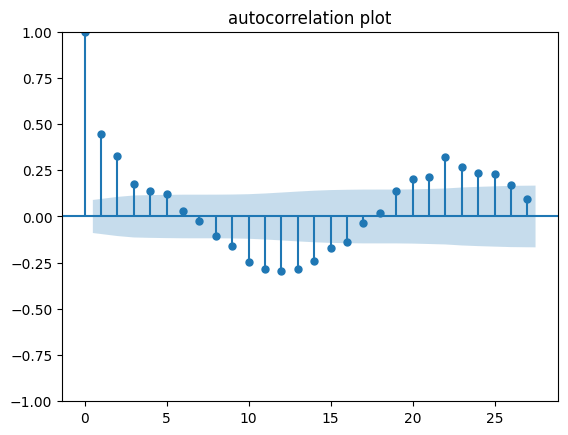

In [16]:
#3c
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['NDVI'].dropna())
plt.title('autocorrelation plot')
plt.show()

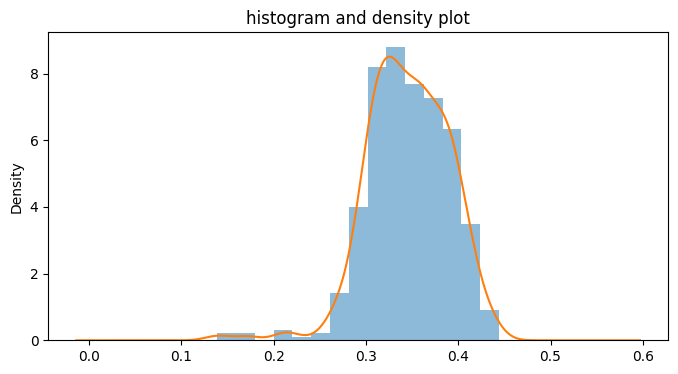

In [17]:
#3d
plt.figure(figsize=(8,4))
df['NDVI'].plot(kind='hist',bins=15,alpha=0.5,density=True)
df['NDVI'].plot(kind='kde')
plt.title('histogram and density plot')
plt.show()

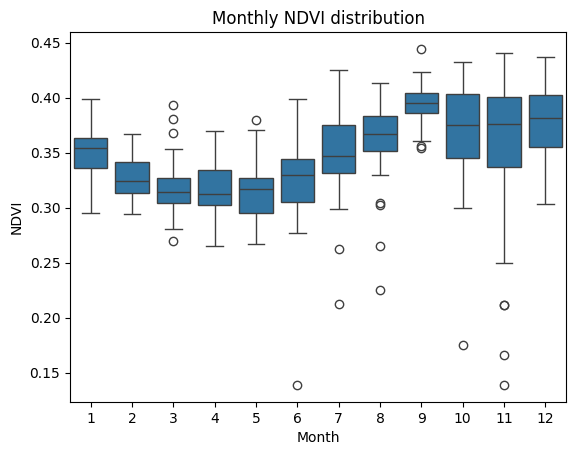

In [18]:
#3e
import seaborn as sns

sns.boxplot(x='Month',y='NDVI',data=df.reset_index())
plt.title('Monthly NDVI distribution')
plt.show()

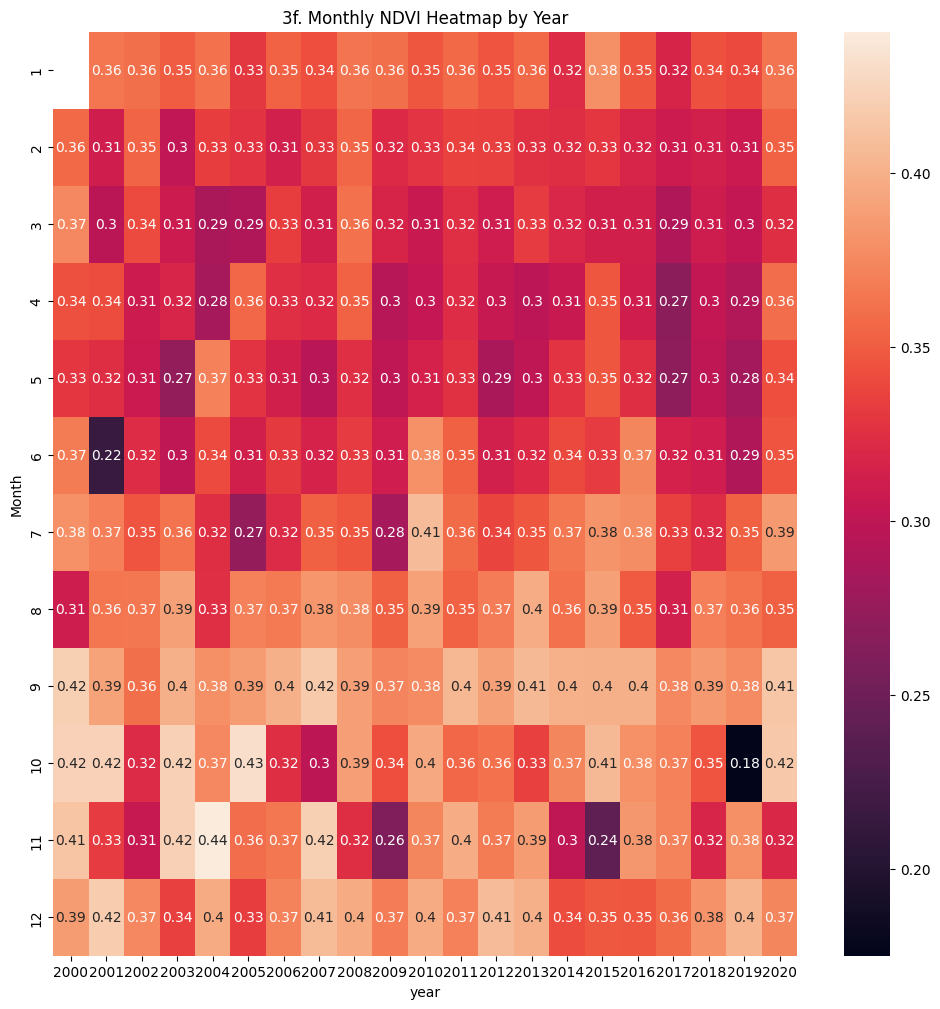

In [19]:
#3f
plt.figure(figsize=(12,12))
df['year']=df.index.year
pivot=df.pivot_table(index='Month',columns='year',values='NDVI')
sns.heatmap(pivot,annot=True)
plt.title('3f. Monthly NDVI Heatmap by Year')
plt.show()

In [20]:
#4a
df_hourly=df['NDVI'].resample('H').asfreq()
df_hourly

date
2000-02-18 00:00:00    0.357012
2000-02-18 01:00:00         NaN
2000-02-18 02:00:00         NaN
2000-02-18 03:00:00         NaN
2000-02-18 04:00:00         NaN
                         ...   
2020-12-17 20:00:00         NaN
2020-12-17 21:00:00         NaN
2020-12-17 22:00:00         NaN
2020-12-17 23:00:00         NaN
2020-12-18 00:00:00    0.354511
Freq: H, Name: NDVI, Length: 182617, dtype: float64

In [21]:
#4b
df_hourly_interp=df_hourly.interpolate(method='linear')
df_hourly_interp

date
2000-02-18 00:00:00    0.357012
2000-02-18 01:00:00    0.357040
2000-02-18 02:00:00    0.357069
2000-02-18 03:00:00    0.357097
2000-02-18 04:00:00    0.357125
                         ...   
2020-12-17 20:00:00    0.354916
2020-12-17 21:00:00    0.354815
2020-12-17 22:00:00    0.354714
2020-12-17 23:00:00    0.354613
2020-12-18 00:00:00    0.354511
Freq: H, Name: NDVI, Length: 182617, dtype: float64

In [22]:
#4c
monthly_avg=df['NDVI'].resample('M').mean()
monthly_avg

date
2000-02-29    0.357012
2000-03-31    0.374335
2000-04-30    0.343834
2000-05-31    0.329554
2000-06-30    0.367749
                ...   
2020-08-31    0.352495
2020-09-30    0.413837
2020-10-31    0.416594
2020-11-30    0.319800
2020-12-31    0.373963
Freq: M, Name: NDVI, Length: 251, dtype: float64

In [23]:
#4d
year_avg=df['NDVI'].resample('Y').mean()
print(year_avg)

date
2000-12-31    0.371972
2001-12-31    0.342778
2002-12-31    0.339722
2003-12-31    0.345398
2004-12-31    0.347566
2005-12-31    0.337834
2006-12-31    0.344052
2007-12-31    0.351945
2008-12-31    0.360715
2009-12-31    0.323054
2010-12-31    0.358502
2011-12-31    0.354923
2012-12-31    0.343166
2013-12-31    0.351145
2014-12-31    0.338795
2015-12-31    0.348688
2016-12-31    0.350633
2017-12-31    0.322314
2018-12-31    0.332973
2019-12-31    0.328236
2020-12-31    0.364459
Freq: A-DEC, Name: NDVI, dtype: float64


In [24]:
#5a
from statsmodels.tsa.stattools import adfuller
adf_result=adfuller(df["NDVI"].dropna())
print("ADF statistic:",adf_result[0])
print("p-value:",adf_result[1])

ADF statistic: -5.400859639234164
p-value: 3.373150403628132e-06


In [25]:
#5b
if adf_result[1]<0.05:
    print("no need to do differencing")
else:
    df['NDVI_diff']=df['NDVI'].diff()

no need to do differencing


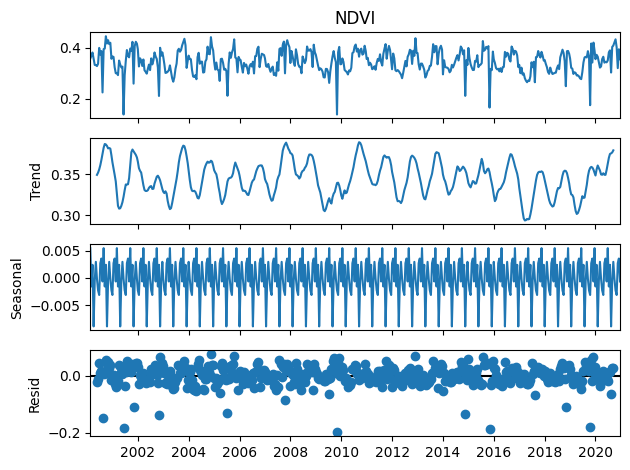

In [26]:
#5c
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df['NDVI'],model="additive",period=12)
decomp.plot()
plt.show()

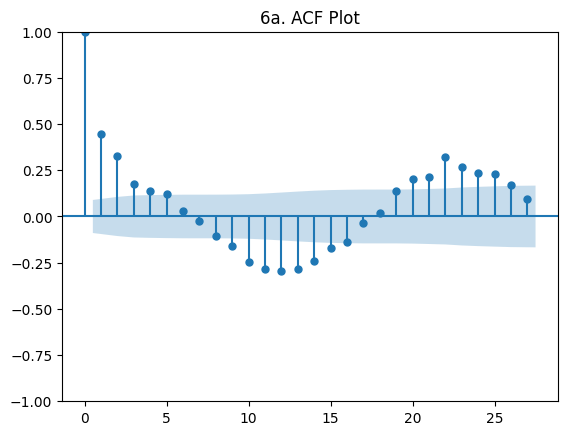

In [27]:
#6a
plot_acf(df['NDVI'].dropna())
plt.title('6a. ACF Plot')
plt.show()

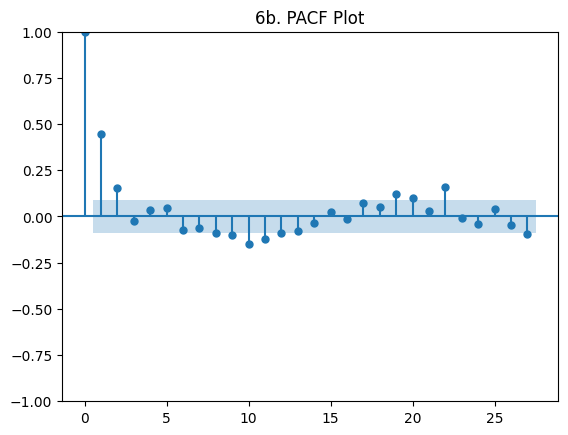

In [28]:
#6b
plot_pacf(df['NDVI'].dropna())
plt.title('6b. PACF Plot')
plt.show()

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [43]:
model = SARIMAX(df['NDVI'],
                order=(1,0,1),           # p,d,q
                seasonal_order=(0,1,1,12),  # P,D,Q,s (12 = yearly seasonality)
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_result = model.fit(disp=False)
print(sarima_result.summary())

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               NDVI   No. Observations:                  480
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 807.308
Date:                            Mon, 05 May 2025   AIC                          -1606.616
Time:                                    23:45:42   BIC                          -1590.144
Sample:                                         0   HQIC                         -1600.126
                                            - 480                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6732      0.070      9.556      0.000       0.535       0.811
ma.L1         -0.2826      0.079   

In [44]:
forecast = sarima_result.get_forecast(steps=20)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

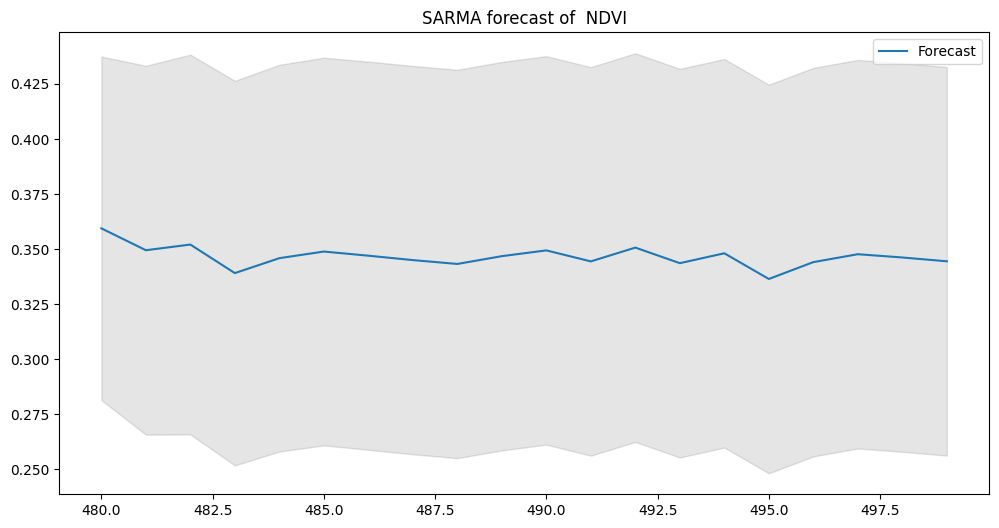

In [46]:
plt.figure(figsize=(12,6))

plt.plot(forecast_mean,label='Forecast')
plt.fill_between(forecast_ci.index,forecast_ci.iloc[:,0],forecast_ci.iloc[:,1],color='k',alpha=0.1)
plt.title('SARMA forecast of  NDVI')
plt.legend()
plt.show()

In [47]:
pred= sarima_result.fittedvalues
actual=df["NDVI"]
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae= mean_absolute_error(actual, pred)
mse= mean_squared_error(actual, pred)
rmse=np.sqrt(mse)
mape=np.mean(np.abs((actual-pred)/actual))*100

print("mean absolute error:",mae)
print("root mean square error:",rmse)
print("mean absolute percentage error:",mape)

mean absolute error: 0.03410084926758186
root mean square error: 0.051970944840290134
mean absolute percentage error: 10.644587043772308
